# Deutsch-Jozsa Algorithm

In [1]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister

### Some function for plotting circuit and representing the statevector

In [2]:
def cplot(circuit):
    return circuit.draw('mpl', scale=0.7, initial_state= True, style= 'iqx')
 
from qiskit.quantum_info import Statevector
def splot(state):
    return Statevector(state).draw('latex') 

## Build a Constant or Balanced function Randomly

In [3]:
# This cell make
def func():
    d = 2**n
    f = []               # empty list 
    k = ['b','c']        # b (c) denotes Balanced (Constant) function
    decide = rm.choice(k)
    if decide == 'c':
        a = rm.randint(0,1)
        for i in range(d):
            f.append(a)
    else:
        for i in range(int(d/2)):
            a = rm.randint(0,1)
            f.append(a)
            if a == 0:
                f.append(1)
            else:
                f.append(0)
    return f

In [4]:
l = input('Number of qubits in the system:') 
n = int(l)

Number of qubits in the system:3


In [5]:
import random as rm

In [6]:
f = func()
print('Random function is:    ',f)

Random function is:     [1, 0, 1, 0, 1, 0, 0, 1]


## Quantum Circuit for Deutsch-Jozsa Algorithm

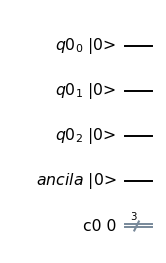

<IPython.core.display.Latex object>

In [7]:
q_ancila = QuantumRegister(1,name='ancila')
q_main = QuantumRegister(n)
c_bits = ClassicalRegister(n)
qc = QuantumCircuit(q_main,q_ancila,c_bits)
display(cplot(qc),splot(qc))

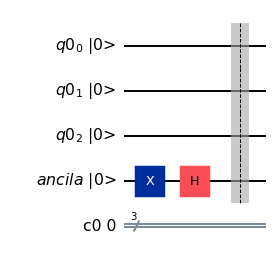

<IPython.core.display.Latex object>

In [8]:
qc.x([n])
qc.h([n])
qc.barrier()
display(cplot(qc),splot(qc))

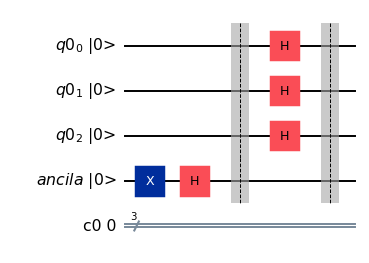

<IPython.core.display.Latex object>

In [9]:
qc.h(range(n))
qc.barrier()
display(cplot(qc),splot(qc))

## $U_f$ function implementation

In [10]:
def uf(circuit): 
    total_qubits = []
    
    for i in range(n):
        total_qubits.append(i)
    #############################################3
    for i in range(2**n):
        zero_list = []
        if f[i] == 1:            
            for j in range(n):                
                if format(i, f'0{n}b')[j] == '0':
                    zero_list.append(j)
                    
        if len(zero_list) != 0:
            circuit.x(zero_list)
            circuit.mct(total_qubits,[n])
            circuit.x(zero_list)
            circuit.barrier()
        else:
            circuit.mct(total_qubits,[n])
            circuit.barrier()
    
    return circuit

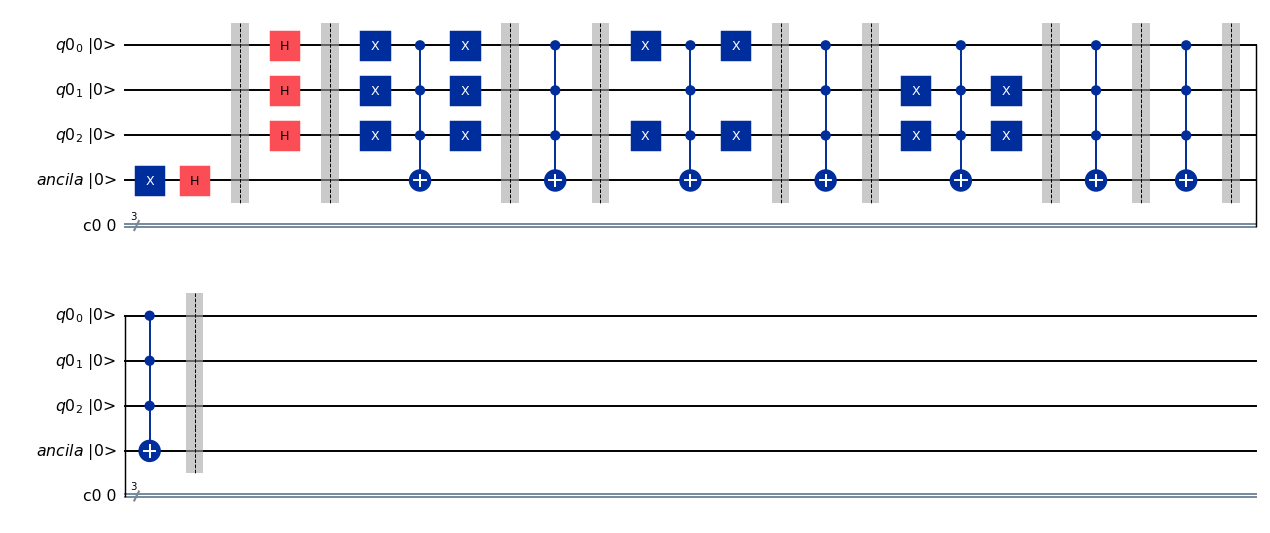

<IPython.core.display.Latex object>

In [11]:
uf(qc)
display(cplot(qc),splot(qc))

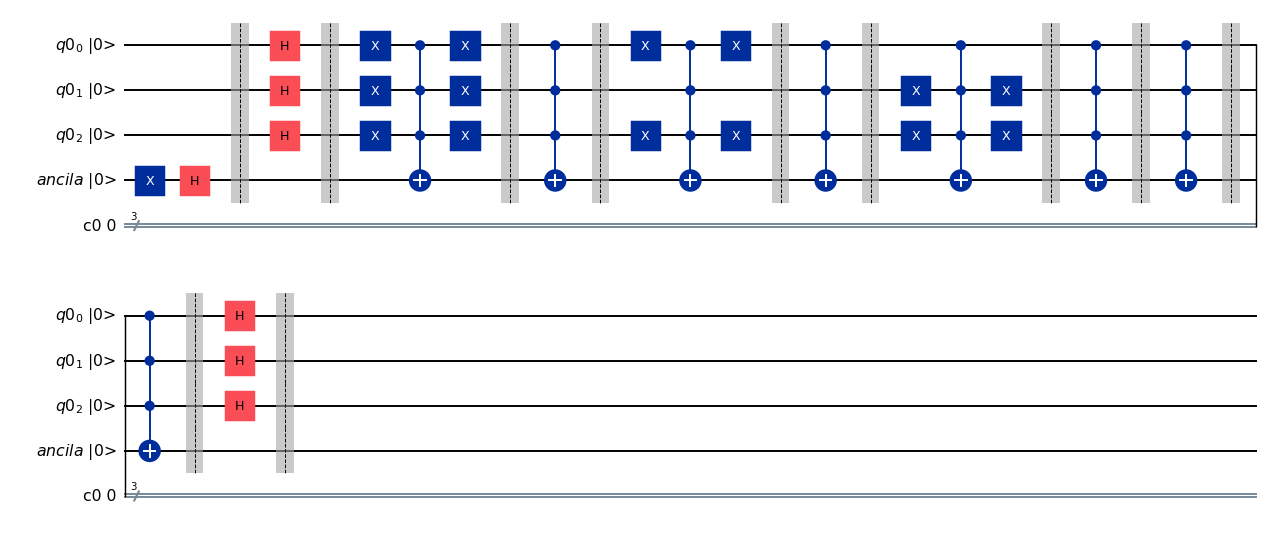

<IPython.core.display.Latex object>

In [12]:
qc.h(range(n))
qc.barrier()
display(cplot(qc),splot(qc))

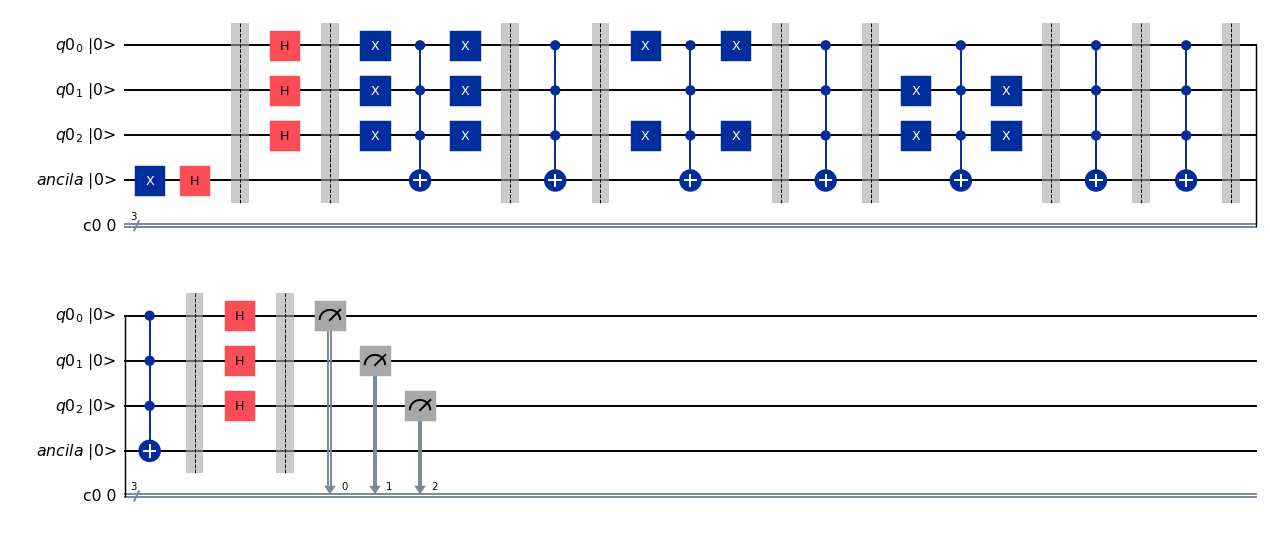

In [13]:
for i in range(n):
    qc.measure([i],[i])
cplot(qc)

In [14]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

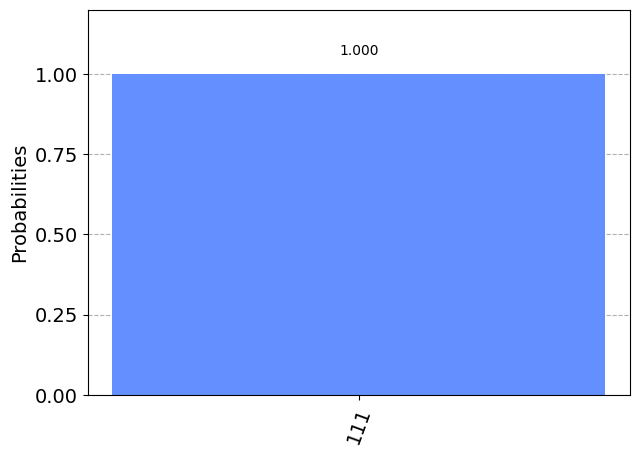

In [15]:
result = QasmSimulator().run(transpile(qc,QasmSimulator()),shots=1).result()
counts = result.get_counts()
plot_histogram(counts)

## Result

If the outcome is a bitstring with all zeros the function will be __Constant__, otherwise is __Balanced__.